# 911 Calls - Kaggle Data Analysis

- For one of the data analysis Capstone Projects in the Python for Data Science and Machine Learning Bootcamp offered by Udemy.com, I analyzed the 911 Calls dataset from Kaggle.com available at https://www.kaggle.com/mchirico/montcoalert

- This dataset contains calls to 911 in Montgomery County Pennsylvania.

#### My goals for this notebook:

This notebook will show examples of how I handle:
- Importing data with Pandas
- Cleaning data
- Exploring data through visualizations with Matplotlib & Seaborn

#### For this exercise, I will require the following libraries:
- NumPy
- Pandas
- Matplotlib
- Seaborn

## First - Understand the Data

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Read in excel file

In [2]:
df = pd.read_csv('911.csv')

- To understand the types of data in the 911.csv file

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


- Visualize top rows

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Second - Clean the Data

- Checking the columns for null values. Replacing with 'Other' if any

In [5]:
df['lat'].isnull().values.sum()

0

In [6]:
df['lng'].isnull().values.sum()

0

In [7]:
df['desc'].isnull().values.sum()

0

In [8]:
df['zip'].isnull().values.sum()

12855

In [9]:
# Replacing the null values in the zip column with 'Other'
df['zip'].fillna("Other",inplace=True)

In [10]:
df['title'].isnull().values.sum()

0

In [11]:
df['timeStamp'].isnull().values.sum()

0

In [12]:
df['twp'].isnull().values.sum()

43

In [13]:
# Replacing the lat column for null values 
df['twp'].fillna("Other",inplace=True)

In [14]:
df['addr'].isnull().values.sum()

519

In [15]:
# Replacing the addr column for null values 
df['addr'].fillna("Other",inplace=True)

In [16]:
df['e'].isnull().values.sum()

0

## Third - Explore the Data

- What are the top 5 zipcodes for 911 calls?

In [17]:
df['zip'].value_counts().head(5) #We can exclude the 'Other' and focus on top 5 zip codes

Other      12855
19401.0     6979
19464.0     6643
19403.0     4854
19446.0     4748
Name: zip, dtype: int64

- What are the top 5 townships for 911 calls?

In [18]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

- How many unique reasons have people called about?

In [19]:
df['title'].nunique()

110

- What were the top 5 unique reasons?

In [20]:
df['title'].value_counts().head(5)

Traffic: VEHICLE ACCIDENT -    23066
Traffic: DISABLED VEHICLE -     7702
Fire: FIRE ALARM                5496
EMS: RESPIRATORY EMERGENCY      5112
EMS: CARDIAC EMERGENCY          5012
Name: title, dtype: int64

- What are the main categories of reasons for the calls?

In [21]:
df['reasons'] = df['title'].apply(lambda x: x.split(':')[0])

In [22]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,Other,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


- Rank reasons category by amount of calls

In [23]:
df['reasons'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

- What days are the most calls made on?

In [24]:
# Convert timestamp column from strings into datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
#Create new columns for the day, month and hour of the calls
df['Hour']= df['timeStamp'].apply(lambda time: time.hour)
df['Month']= df['timeStamp'].apply(lambda time: time.month)
df['Day']= df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,Hour,Month,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,Other,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [25]:
# Map each number from the Day column to the actual day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Week Day'] = df['Day'].map(dmap)

In [26]:
df['Week Day'].value_counts().head()

Tue    15150
Wed    14879
Fri    14833
Mon    14680
Thu    14478
Name: Week Day, dtype: int64

## Fourth - Visualize the Data

In [27]:
sns.set_style('whitegrid')

- Main reasons for 911 calls

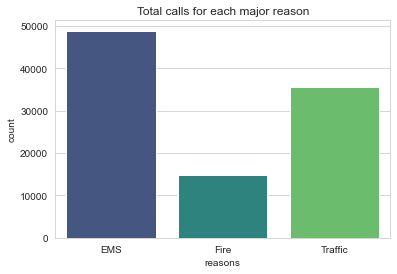

In [28]:
sns.countplot(data=df, x='reasons',palette='viridis')
plt.title('Total calls for each major reason')
plt.savefig('Calls_categorized_by_reason.png',bbox_inches='tight')

- Calls grouped by day of the week and reasons

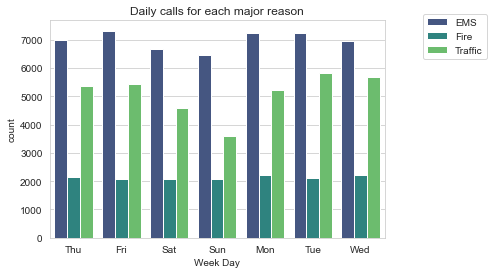

In [29]:
sns.countplot(x=df['Week Day'], hue=df['reasons'], palette='viridis')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Daily calls for each major reason')
plt.savefig('Calls_categorized_by_reason_and_weekday.png',bbox_inches='tight')

- View the number of calls over the period of data collection

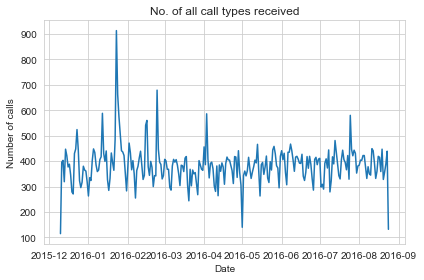

In [30]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())
df.groupby('Date').count()['twp'].plot()
plt.title('No. of all call types received')
plt.ylabel('Number of calls')
plt.tight_layout()
plt.savefig('Daily_Trend_All_Calls_.Received.png',bbox_inches='tight')

- View the number of calls for each of the reasons in a time series

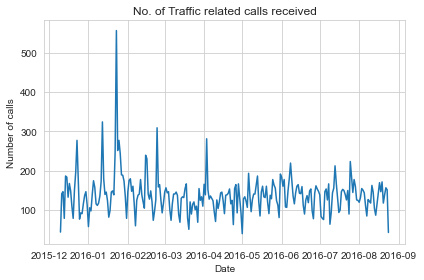

In [31]:
df[df['reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('No. of Traffic related calls received')
plt.ylabel('Number of calls')
plt.tight_layout()
plt.savefig('Trend_Traffic_Related_Calls.png',bbox_inches='tight')

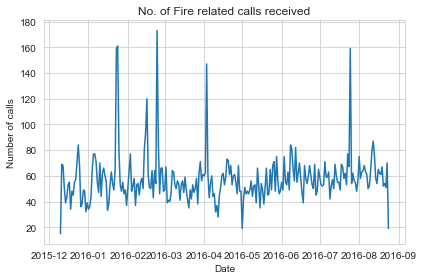

In [32]:
df[df['reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('No. of Fire related calls received')
plt.ylabel('Number of calls')
plt.tight_layout()
plt.savefig('Trend_Fire_Related_Calls.png',bbox_inches='tight')

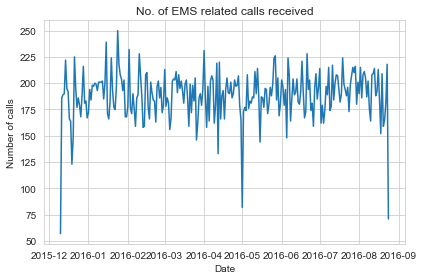

In [33]:
df[df['reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('No. of EMS related calls received')
plt.ylabel('Number of calls')
plt.tight_layout()
plt.savefig('Trend_EMS_Related_Calls.png',bbox_inches='tight')

- Understand the variation within the data

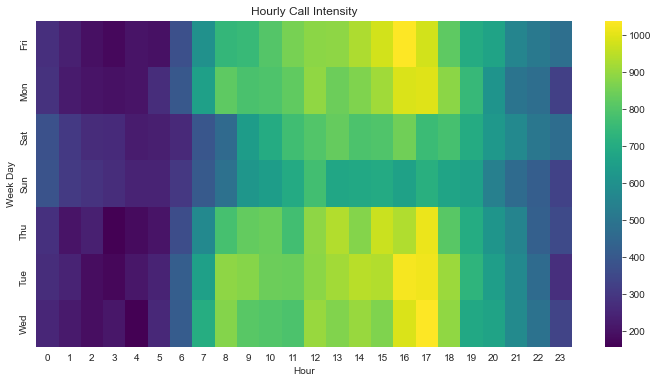

In [36]:
dayHour = df.groupby(by=['Week Day','Hour']).count()['reasons'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')
plt.title('Hourly Call Intensity')
plt.savefig('Heatmap_Hourly_Call_Intensity.png',bbox_inches='tight')

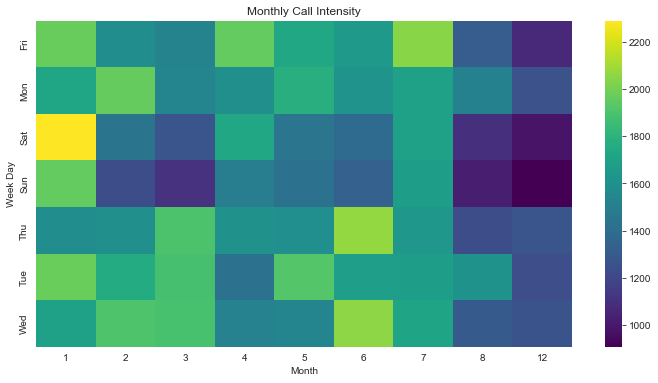

In [37]:
dayMonth = df.groupby(by=['Week Day','Month']).count()['reasons'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')
plt.title('Monthly Call Intensity')
plt.savefig('Heatmap_Monthly_Call_Intensity.png',bbox_inches='tight')